In [49]:
import pandas as pd
from db_utils import fetch_data_from_db
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle

%matplotlib inline

In [50]:
sql_query = "SELECT * FROM stg_Churn;"

data = fetch_data_from_db(sql_query)

df = pd.DataFrame(data)

print(df)

        id Customer_ID  Gender  Age Married          State  \
0        1   19877-DEL    Male   35      No          Delhi   
1        2   58353-MAH  Female   45     Yes    Maharashtra   
2        3   25063-WES    Male   51      No    West Bengal   
3        4   59787-KAR    Male   79      No      Karnataka   
4        5   28544-TAM  Female   80      No     Tamil Nadu   
...    ...         ...     ...  ...     ...            ...   
6002  6414   43397-UTT  Female   41      No  Uttar Pradesh   
6003  6415   22240-HAR    Male   51     Yes        Haryana   
6004  6416   78682-KER  Female   65     Yes         Kerala   
6005  6417   17816-ODI    Male   23      No         Odisha   
6006  6418   34476-TAM    Male   73      No     Tamil Nadu   

      Number_of_Referrals  Tenure_in_Months Value_Deal Phone_Service  \
0                       7                27       None           Yes   
1                      14                13       None           Yes   
2                       4              

In [51]:
df.shape

(6007, 33)

In [52]:
df.head()

,id,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,1,19877-DEL,Male,35,No,Delhi,7,27,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NA,NA
1,2,58353-MAH,Female,45,Yes,Maharashtra,14,13,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NA,NA
2,3,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,4,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,5,28544-TAM,Female,80,No,Tamil Nadu,3,8,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [53]:
pd.set_option("display.max_columns", None)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6007 non-null   int64  
 1   Customer_ID                  6007 non-null   object 
 2   Gender                       6007 non-null   object 
 3   Age                          6007 non-null   int64  
 4   Married                      6007 non-null   object 
 5   State                        6007 non-null   object 
 6   Number_of_Referrals          6007 non-null   int64  
 7   Tenure_in_Months             6007 non-null   int64  
 8   Value_Deal                   6007 non-null   object 
 9   Phone_Service                6007 non-null   object 
 10  Multiple_Lines               6007 non-null   object 
 11  Internet_Service             6007 non-null   object 
 12  Internet_Type                6007 non-null   object 
 13  Online_Security   

In [55]:
numerical_features_list = ["id", "Customer_ID","Age", "Tenure_in_Months", "Total_Charges", "Monthly_Charge", "Total_Refunds", "Total_Extra_Data_Charges", "Total_Long_Distance_Charges", "Total_Revenue" ]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

Gender ['Male' 'Female']
--------------------------------------------------
Married ['No' 'Yes']
--------------------------------------------------
State ['Delhi' 'Maharashtra' 'West Bengal' 'Karnataka' 'Tamil Nadu' 'Telangana'
 'Gujarat' 'Uttar Pradesh' 'Rajasthan' 'Bihar' 'Andhra Pradesh'
 'Madhya Pradesh' 'Chhattisgarh' 'Punjab' 'Jharkhand' 'Haryana'
 'Jammu & Kashmir' 'Assam' 'Uttarakhand' 'Odisha' 'Kerala' 'Puducherry']
--------------------------------------------------
Number_of_Referrals [ 7 14  4  3  9 12  0  6 15  8  1  5  2 10 13 11]
--------------------------------------------------
Value_Deal ['None' 'Deal 5' 'Deal 4' 'Deal 1' 'Deal 2' 'Deal 3']
--------------------------------------------------
Phone_Service ['Yes' 'No']
--------------------------------------------------
Multiple_Lines ['No' 'Yes']
--------------------------------------------------
Internet_Service ['Yes' 'No']
--------------------------------------------------
Internet_Type ['Cable' 'Fiber Optic' 'DSL' 'N

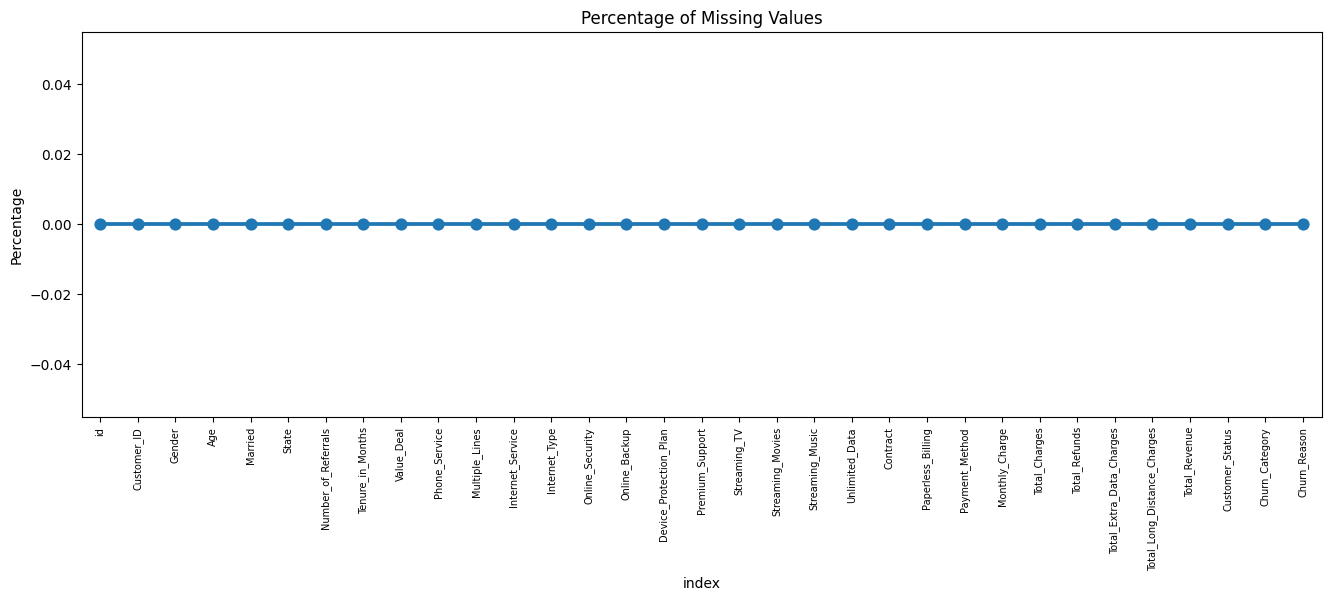

In [56]:
missing = pd.DataFrame((df.isnull().sum() * 100 / df.shape[0]), columns=['Percentage']).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

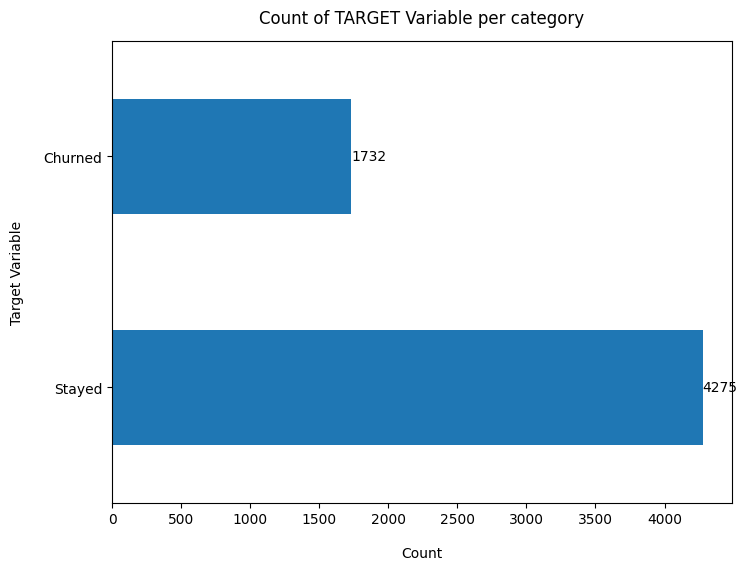

In [57]:
df['Customer_Status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

for index, value in enumerate(df['Customer_Status'].value_counts()):
    plt.text(value, index, str(value), va='center')

plt.show()

In [58]:
100*df['Customer_Status'].value_counts()/len(df['Customer_Status'])

Customer_Status
Stayed     71.166972
Churned    28.833028
Name: count, dtype: float64

In [59]:
df = df.drop(columns=["Customer_ID", "id", "Churn_Category", "Churn_Reason"])

In [60]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246065
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181187
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.300000


In [61]:
print("Max Age: " + str(df['Age'].max()))
print("Min Age: " + str(df['Age'].min()))

print("Max Tenure: " + str(df['Tenure_in_Months'].max()))
print("Min Tenure: " + str(df['Tenure_in_Months'].min()))

Max Age: 84
Min Age: 18
Max Tenure: 36
Min Tenure: 1


In [62]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

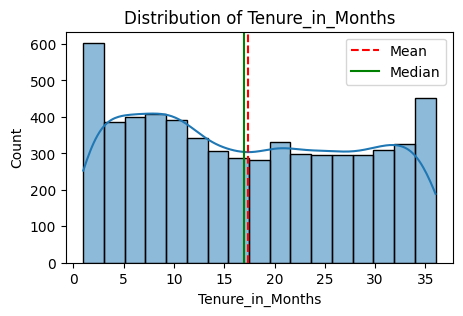

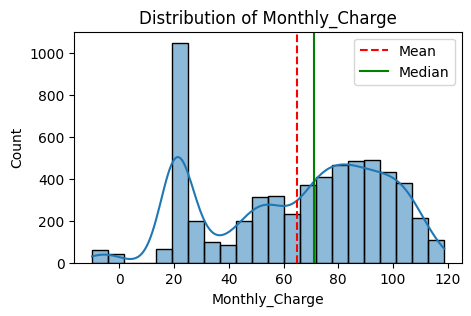

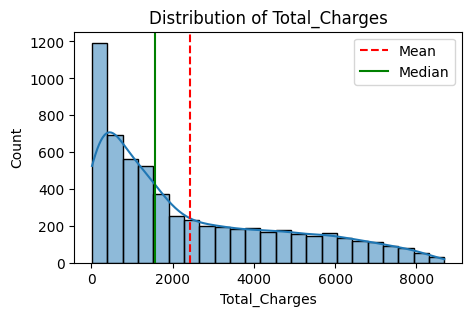

In [63]:
plot_histogram(df, "Tenure_in_Months")
plot_histogram(df, "Monthly_Charge")
plot_histogram(df, "Total_Charges")

In [64]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

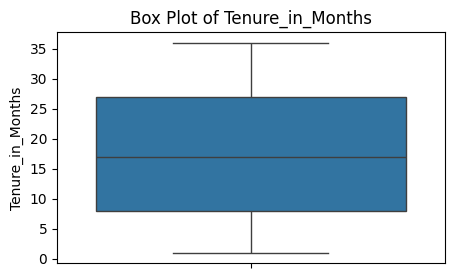

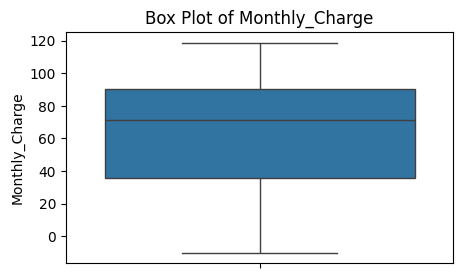

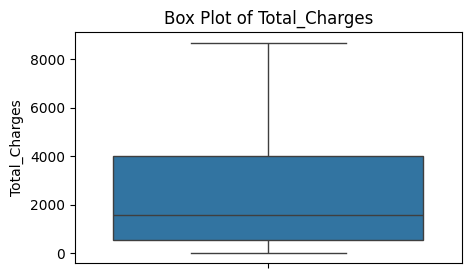

In [65]:
plot_boxplot(df, "Tenure_in_Months")
plot_boxplot(df, "Monthly_Charge")
plot_boxplot(df, "Total_Charges")

In [66]:
# Group the tenure in bins of 6 months
bins = list(range(1, 37, 6))  # Generate bin edges 
bins.append(37)  # Ensure the last bin includes tenure values up to 36

labels = ["{0} - {1}".format(bins[i], bins[i + 1] - 1) for i in range(len(bins) - 1)]

df['Tenure_Group'] = pd.cut(df['Tenure_in_Months'], bins=bins, right=False, labels=labels)

print(df[['Tenure_in_Months', 'Tenure_Group']])

      Tenure_in_Months Tenure_Group
0                   27      25 - 30
1                   13      13 - 18
2                   35      31 - 36
3                   21      19 - 24
4                    8       7 - 12
...                ...          ...
6002                33      31 - 36
6003                19      19 - 24
6004                25      25 - 30
6005                10       7 - 12
6006                21      19 - 24

[6007 rows x 2 columns]


In [67]:
bins = list(range(1, 85, 6))
bins.append(85) 

labels = ["{0} - {1}".format(bins[i], bins[i + 1] - 1) for i in range(len(bins) - 1)]

df['Age_Group'] = pd.cut(df['Age'], bins=bins, right=False, labels=labels)

print(df[['Age', 'Age_Group']])

      Age Age_Group
0      35   31 - 36
1      45   43 - 48
2      51   49 - 54
3      79   79 - 84
4      80   79 - 84
...   ...       ...
6002   41   37 - 42
6003   51   49 - 54
6004   65   61 - 66
6005   23   19 - 24
6006   73   73 - 78

[6007 rows x 2 columns]


## Insights:

- Customer ID removed as it is not required for modelling  
- No missing values in the dataset  
- Class imbalance identified in the target, ratio = 71:29
- So we analyse the data with other features while taking the target values separately to get some insights.
- We don't have any missing data.

## General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Exploration

1) Plot distibution of individual predictors by churn

## Univariate Analysis


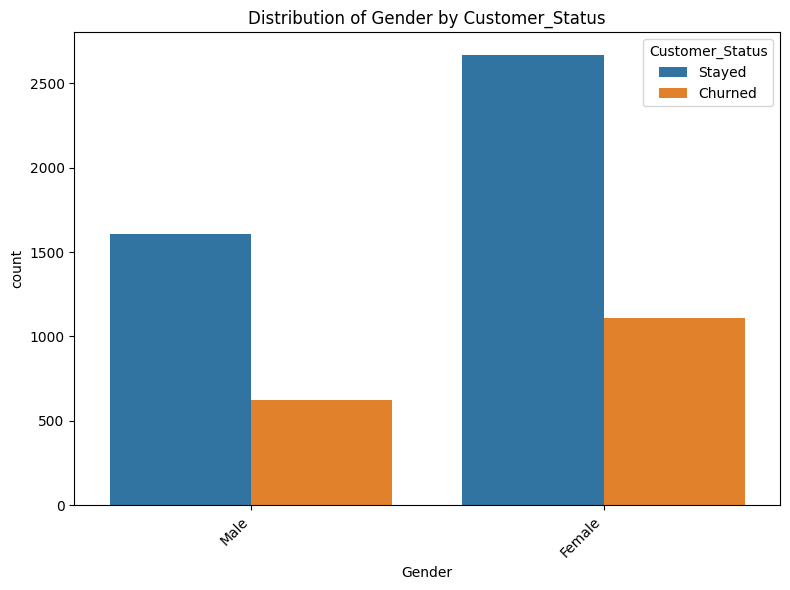

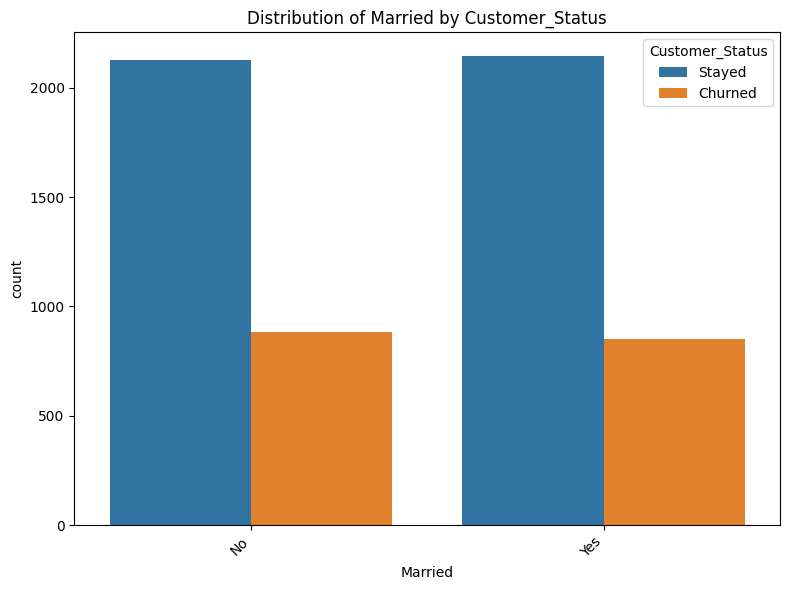

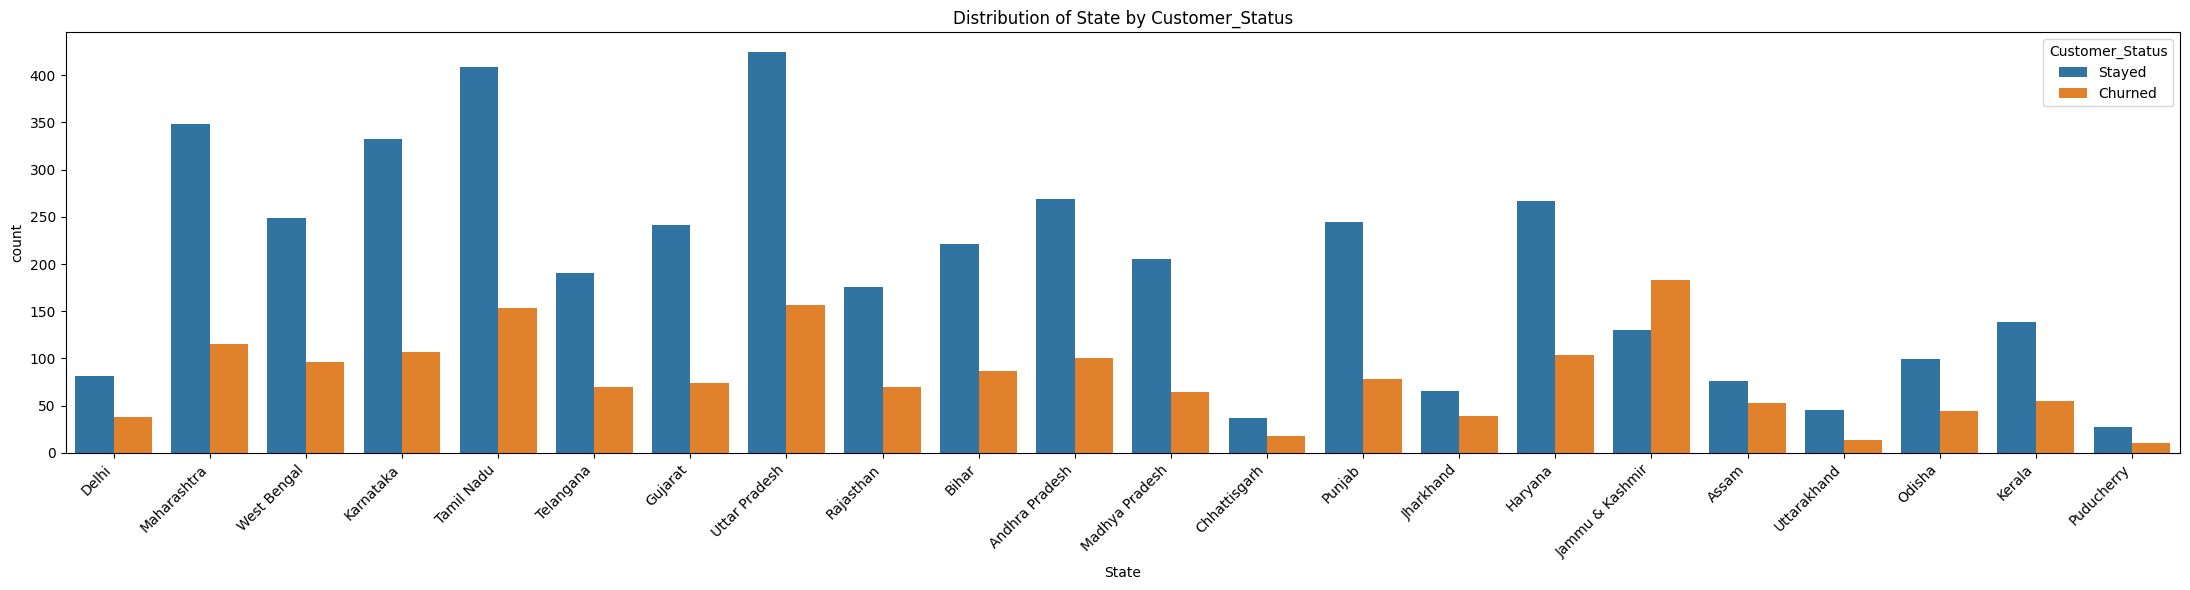

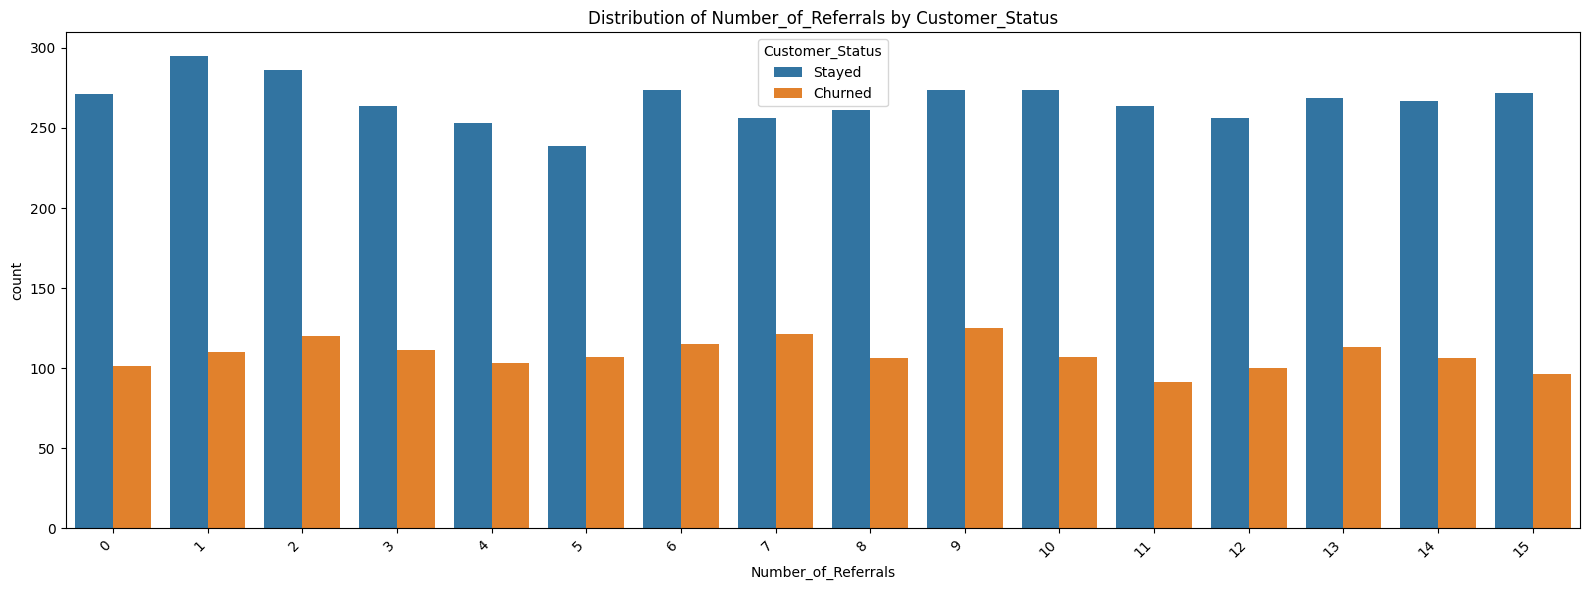

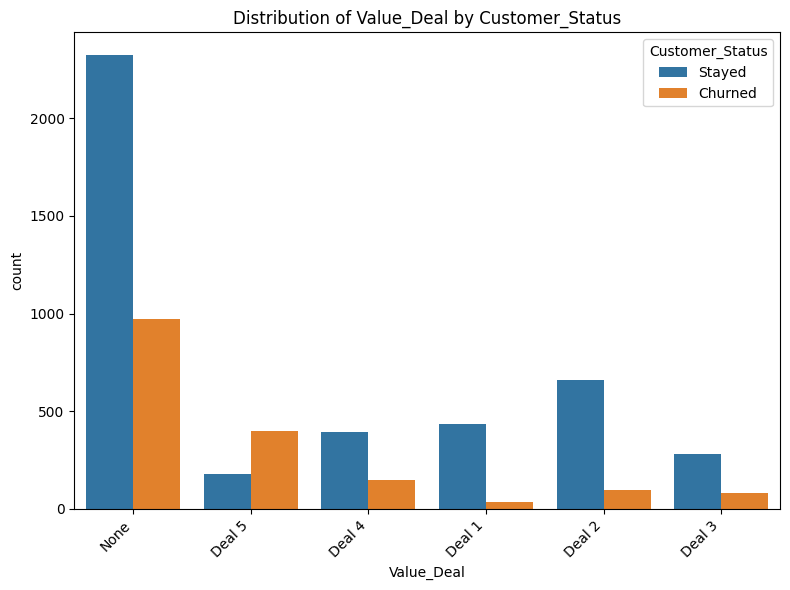

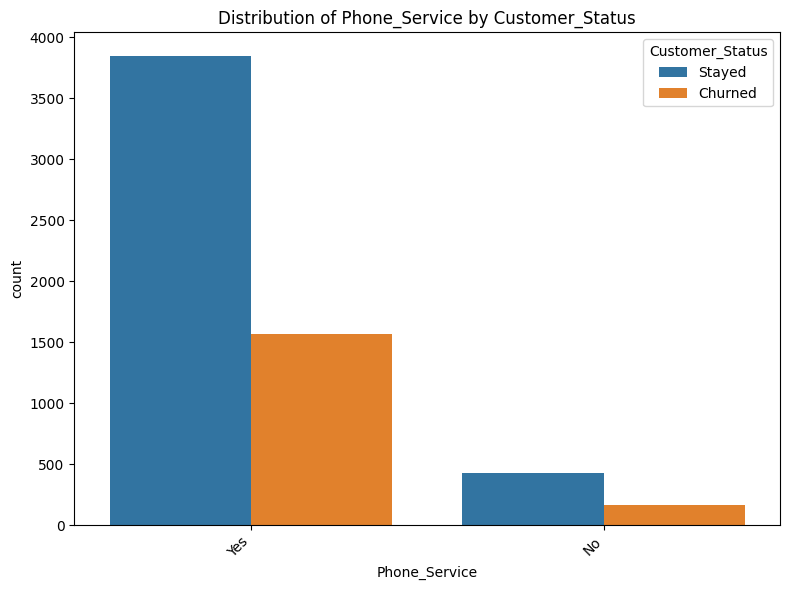

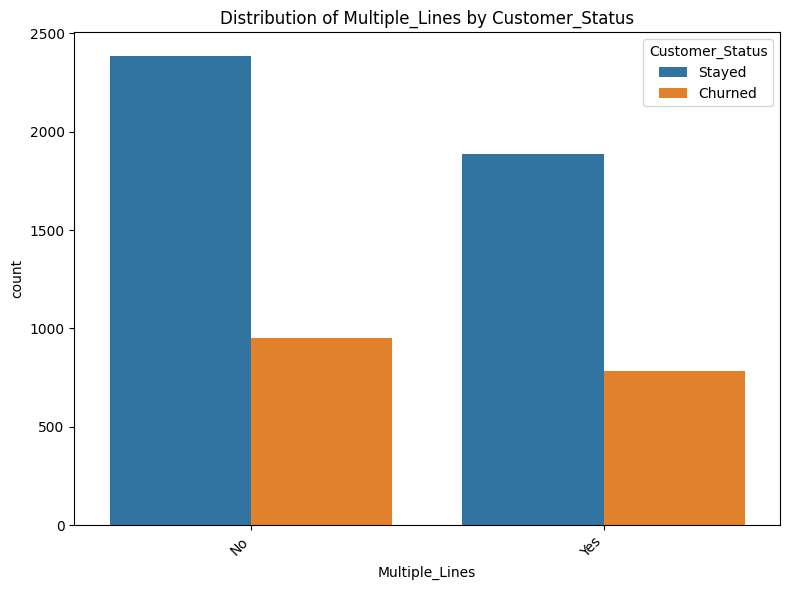

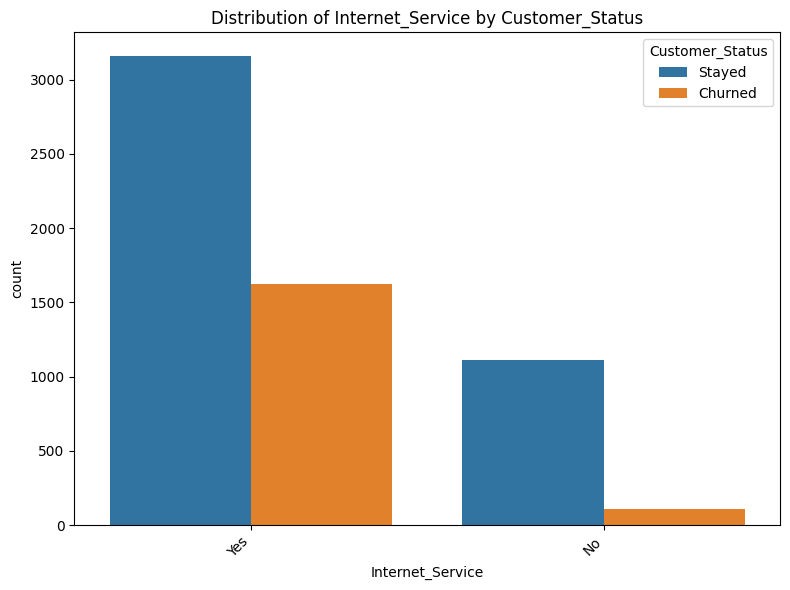

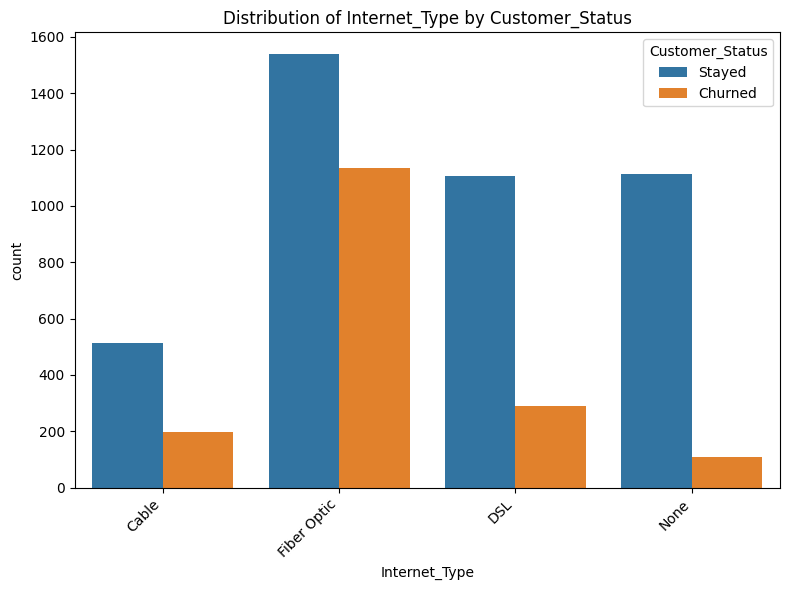

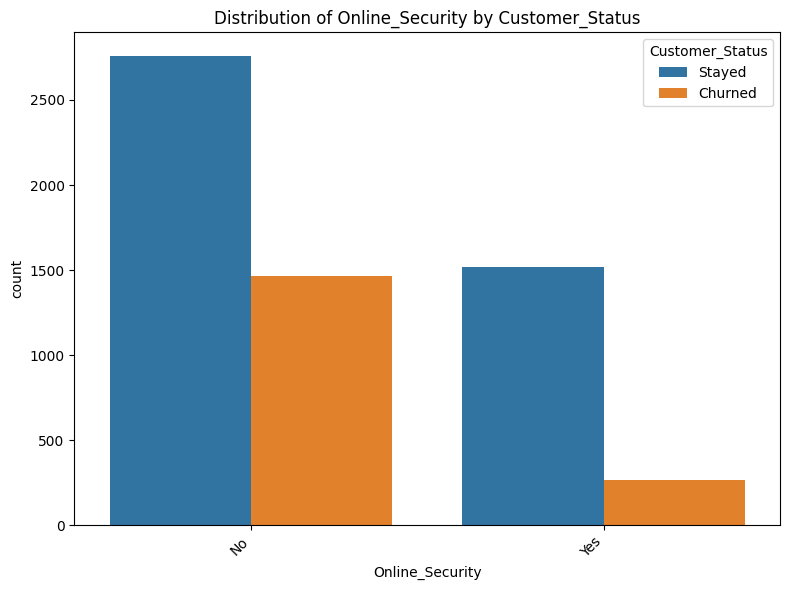

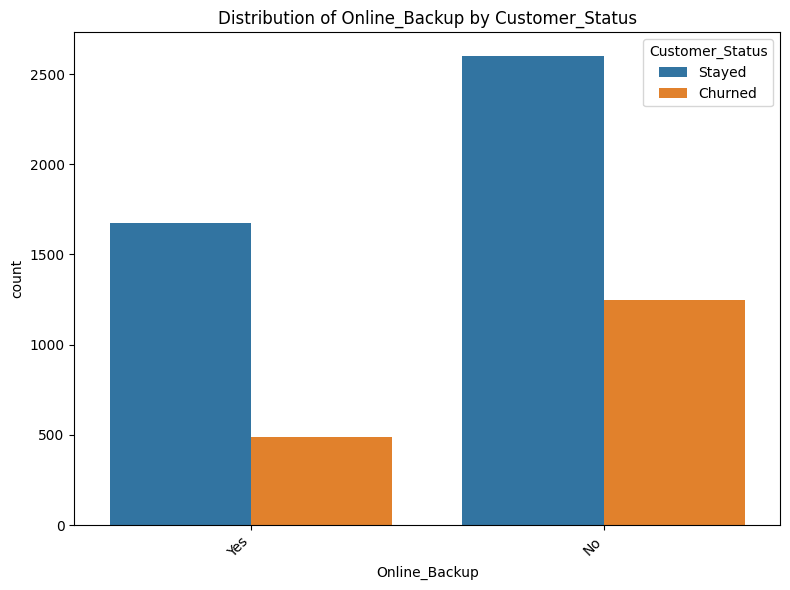

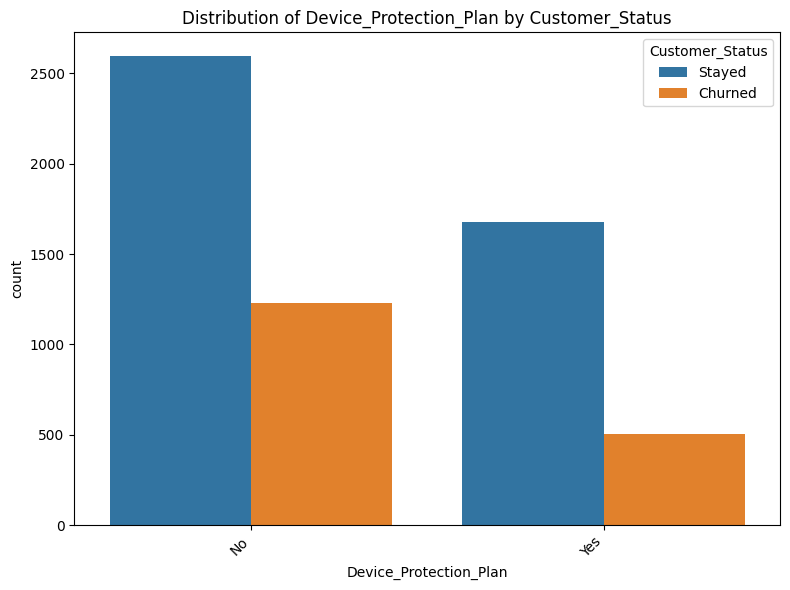

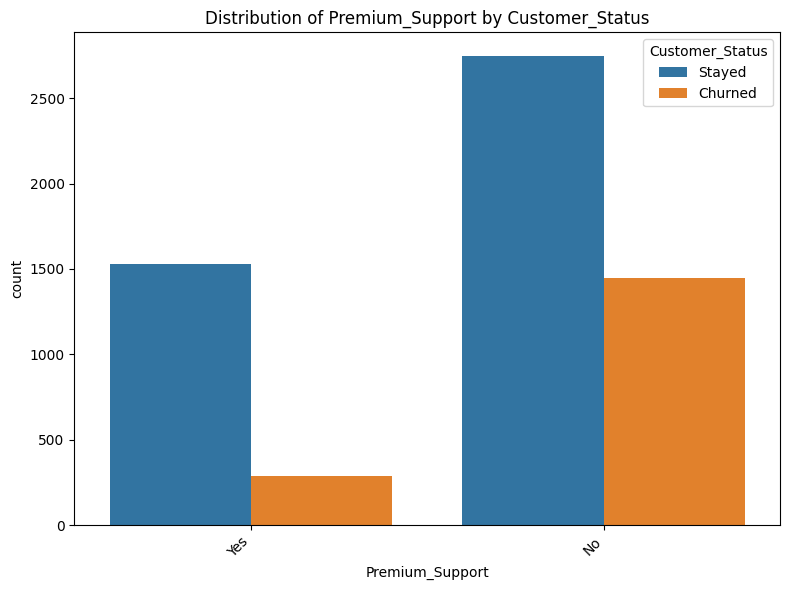

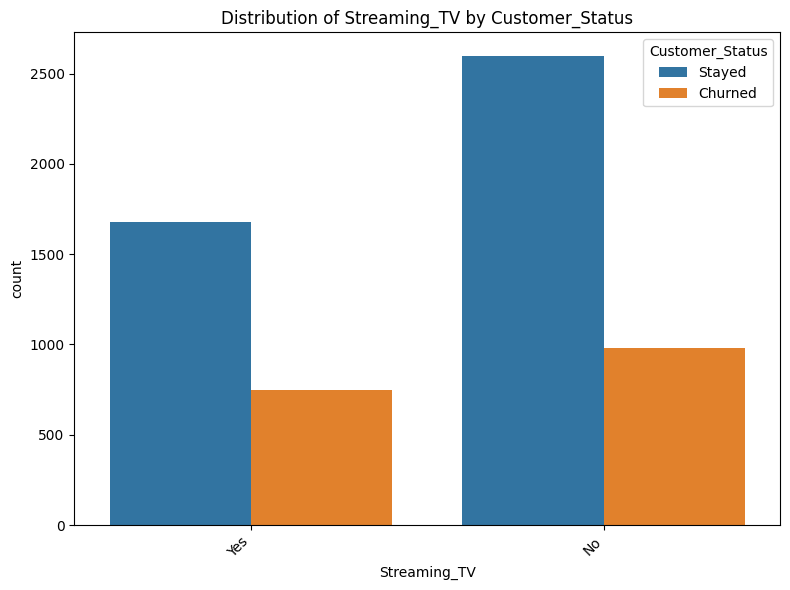

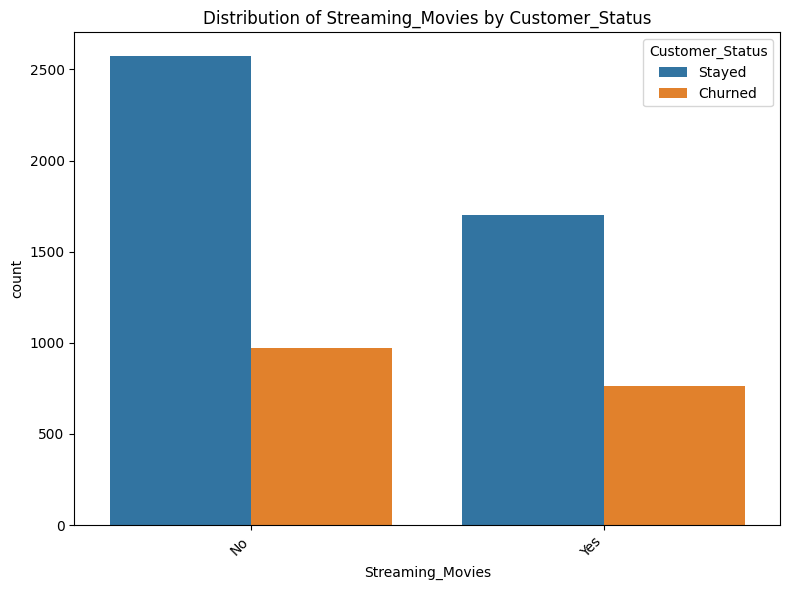

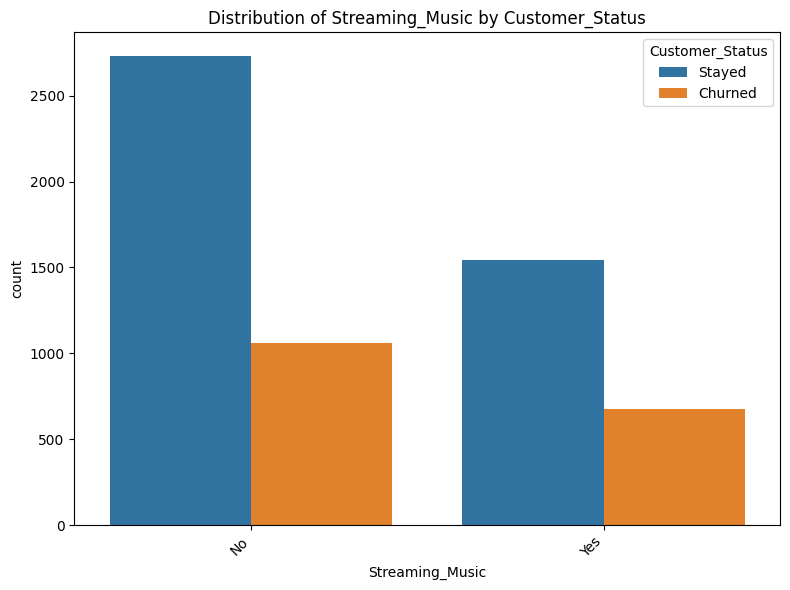

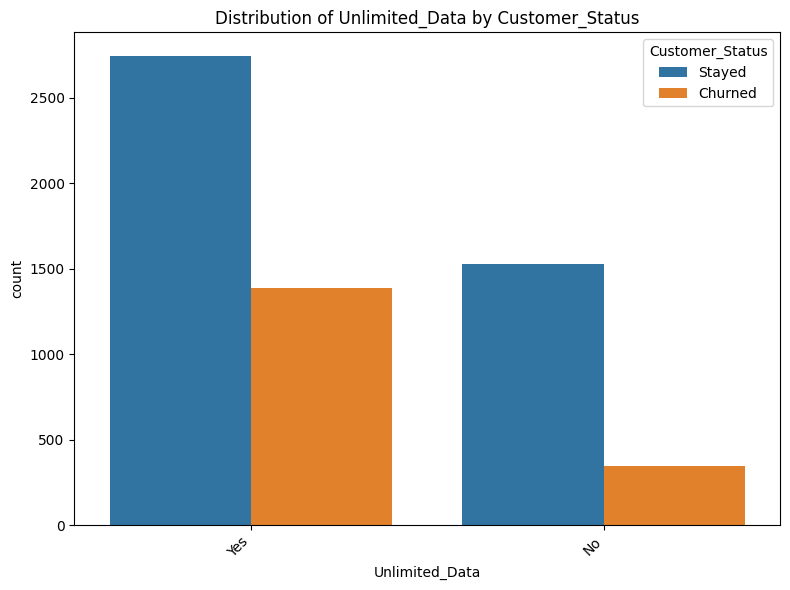

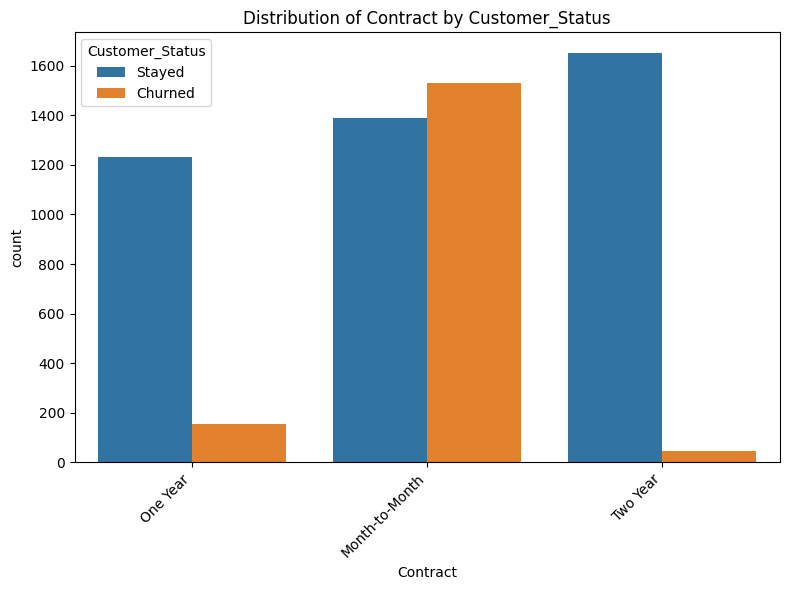

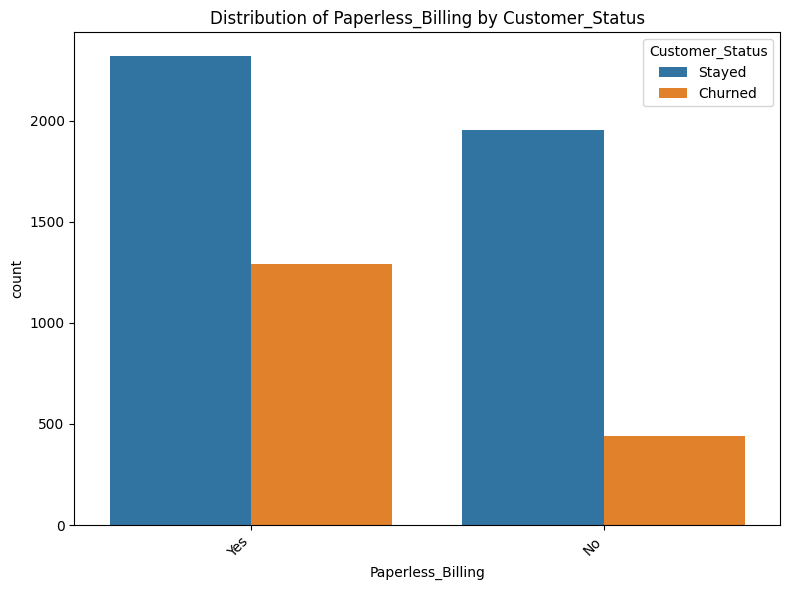

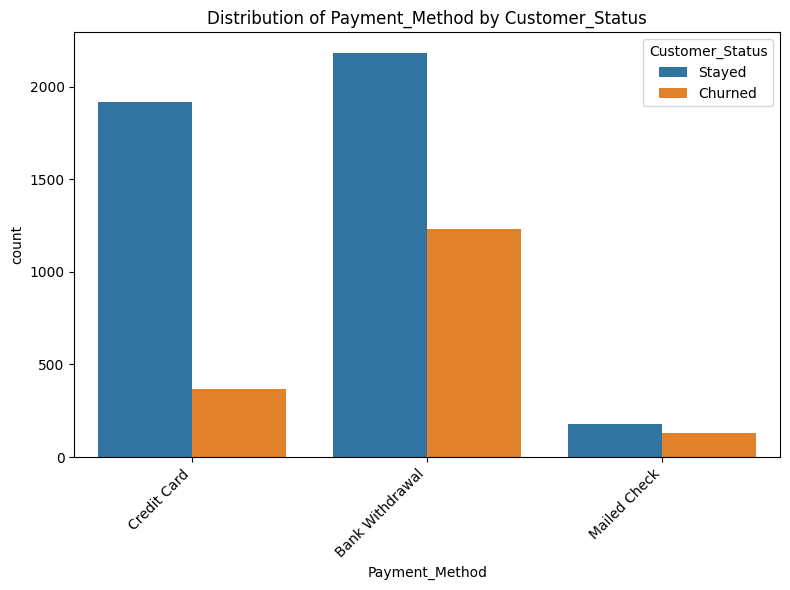

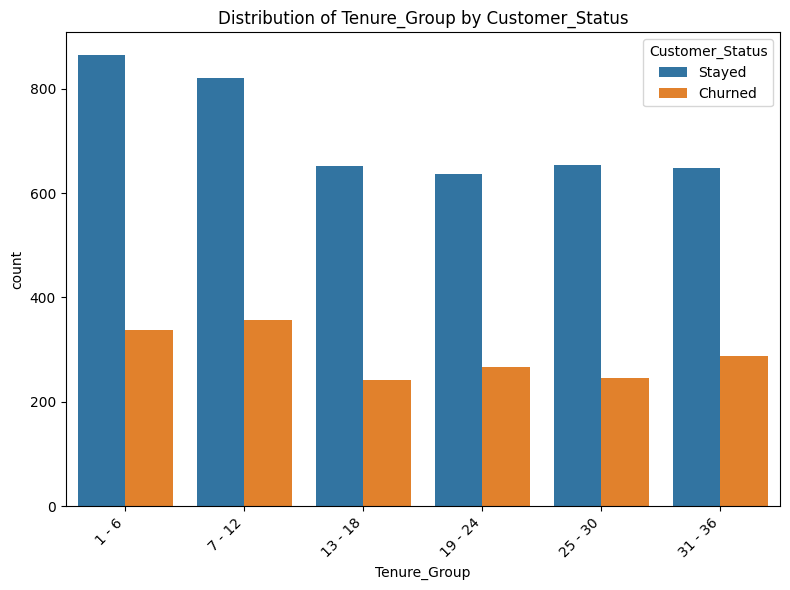

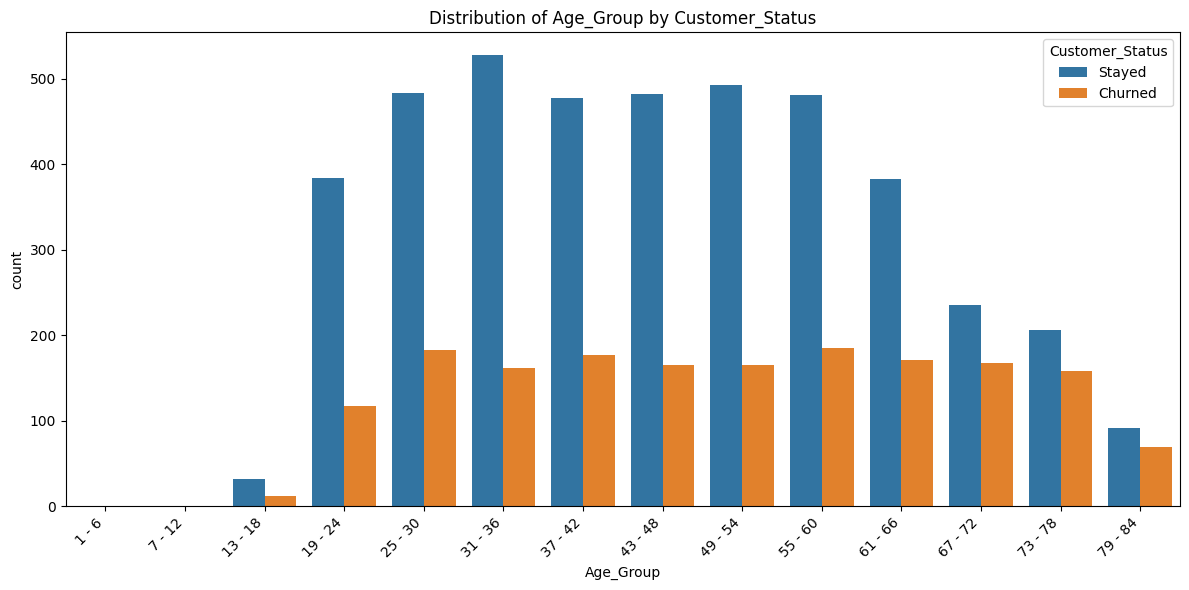

In [68]:
for i, predictor in enumerate(df.drop(columns=['Customer_Status'])):
    if predictor not in numerical_features_list:
        unique_values = df[predictor].nunique()
        figure_width = max(unique_values * (100 / 100), 8) 
        plt.figure(i, figsize=(figure_width, 6))
        sns.countplot(data=df, x=predictor, hue='Customer_Status')
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.title(f"Distribution of {predictor} by Customer_Status", fontsize=12)
        plt.tight_layout()
        plt.show()


## Churn by Monthly Charges and Total Charges

C:\Users\Client\AppData\Local\Temp\ipykernel_748\2005894984.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df["Monthly_Charge"][(df["Customer_Status"] == "Churned") ],
C:\Users\Client\AppData\Local\Temp\ipykernel_748\2005894984.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df["Monthly_Charge"][(df["Customer_Status"] == "Stayed") ],


Text(0.5, 1.0, 'Monthly charges by churn')

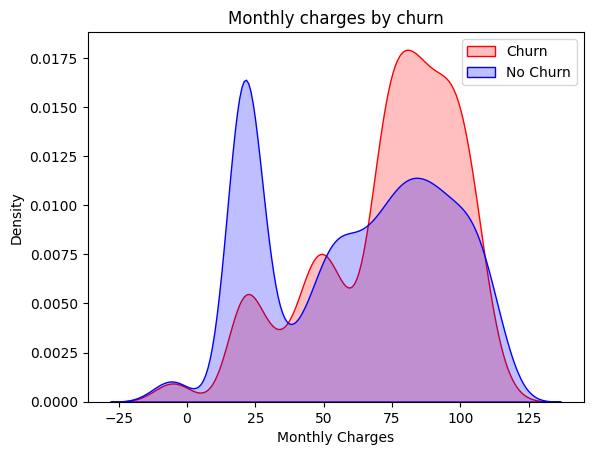

In [69]:
Mth = sns.kdeplot(df["Monthly_Charge"][(df["Customer_Status"] == "Churned") ],
                color="Red", shade = True)
Mth = sns.kdeplot(df["Monthly_Charge"][(df["Customer_Status"] == "Stayed") ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["Churn","No Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\Client\AppData\Local\Temp\ipykernel_748\3981892842.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df["Total_Charges"][(df["Customer_Status"] == "Churned") ],
C:\Users\Client\AppData\Local\Temp\ipykernel_748\3981892842.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df["Total_Charges"][(df["Customer_Status"] == "Stayed") ],


Text(0.5, 1.0, 'Total charges by churn')

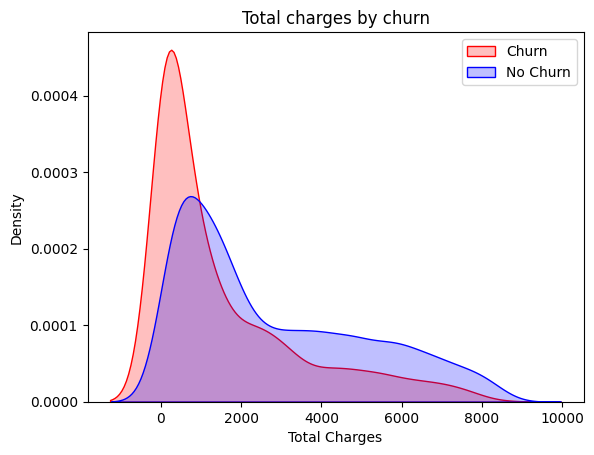

In [70]:
Mth = sns.kdeplot(df["Total_Charges"][(df["Customer_Status"] == "Churned") ],
                color="Red", shade = True)
Mth = sns.kdeplot(df["Total_Charges"][(df["Customer_Status"] == "Stayed") ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["Churn","No Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

## Insight: 
- Churn is high when Monthly Charges are high
- ** Surprising insight ** as higher Churn at lower Total Charges
- However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.


In [71]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method', 'Age_Group', 'Tenure_Group'
]


label_encoders = {} 

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


with open("encoders.pkl", "wb") as f:
  pickle.dump(label_encoders, f)


In [72]:
scaler = StandardScaler()
numerical_columns = [
    'Age', 'Number_of_Referrals', 'Tenure_in_Months', 'Monthly_Charge',
    'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
    'Total_Revenue'
]

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

scalers = {col: StandardScaler().fit(df[[col]]) for col in numerical_columns}
with open("standardScalers.pkl", 'wb') as f:
    pickle.dump(scalers, f)

<Axes: >

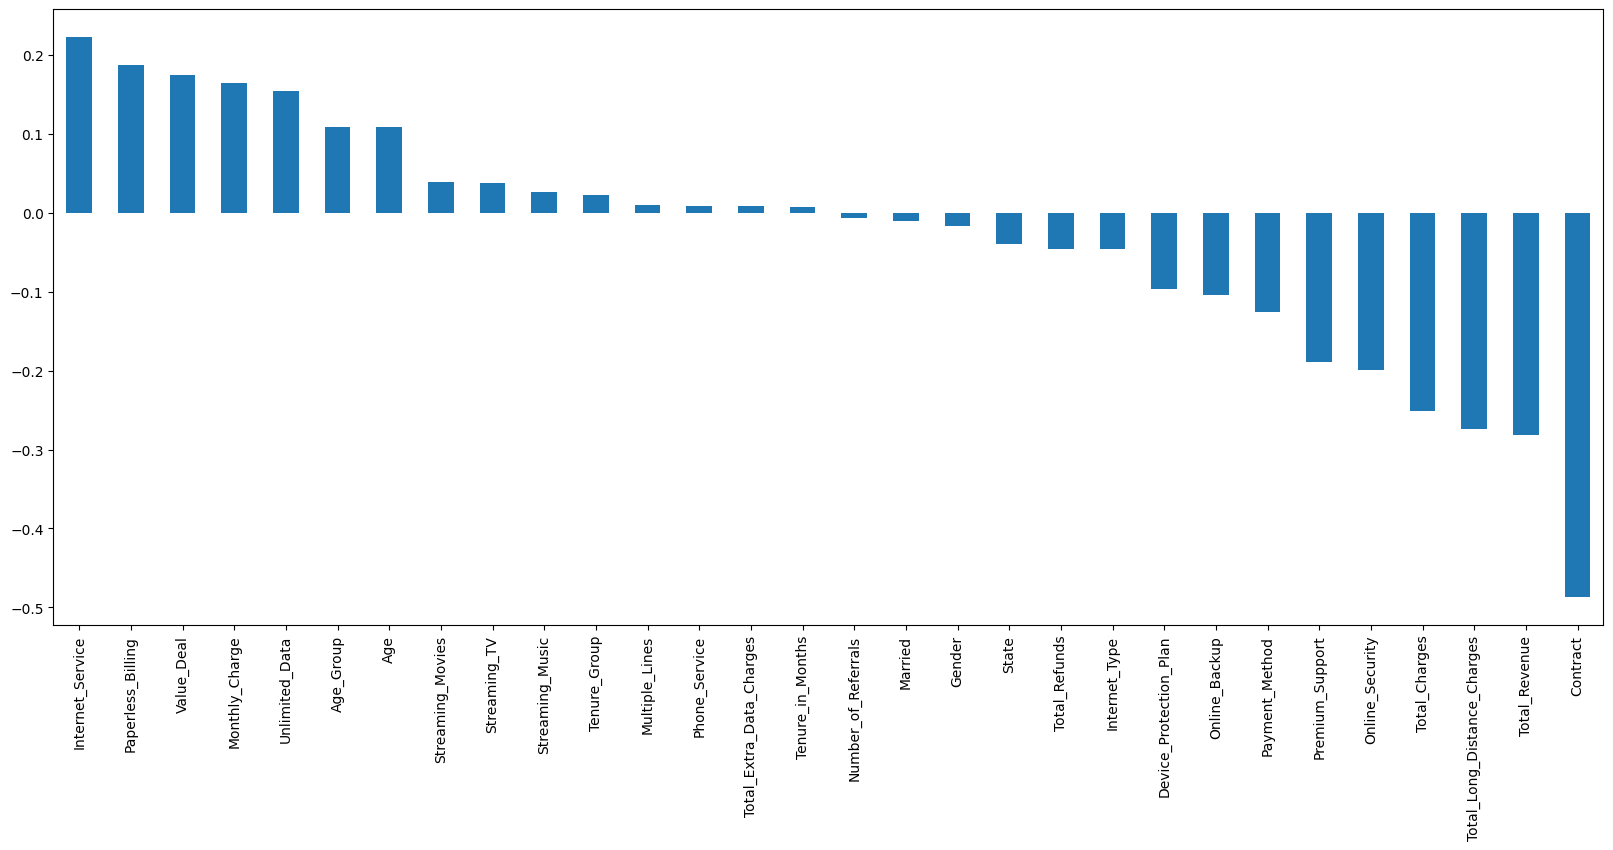

In [73]:
plt.figure(figsize=(20,8))
df.corr()['Customer_Status'].drop('Customer_Status').sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

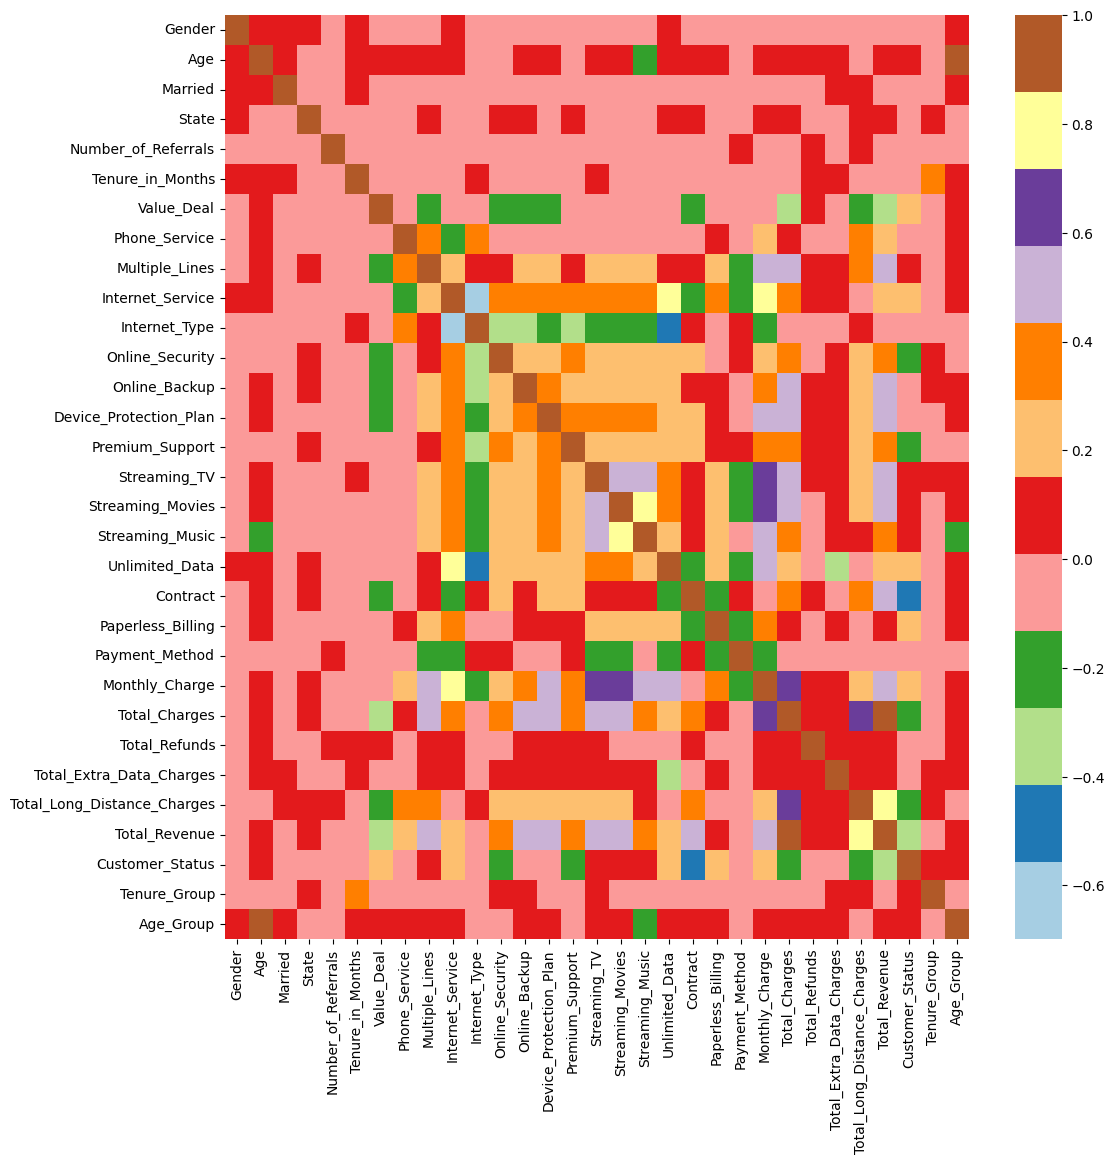

In [74]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

## Loading Final Data into DB

In [76]:
def generate_single_sql_query(df):
    drop_table_query = "DROP TABLE IF EXISTS prod_Churn;"
    
    create_table_query = f"""
    CREATE TABLE prod_Churn (
        {', '.join([f"`{col}` {'FLOAT' if df[col].dtype in ['float64', 'int64'] else 'VARCHAR(255)'}" for col in df.columns])}
    );
    """

    insert_query = f"INSERT INTO prod_Churn ({', '.join([f'{col}' for col in df.columns])}) VALUES "
    rows = [
        f"({', '.join([repr(val) if isinstance(val, str) else str(val) for val in row])})"
        for row in df.to_numpy()
    ]
    insert_query += ", ".join(rows) + ";"

    full_query = f"{drop_table_query} {create_table_query} {insert_query}"
    return full_query


result = fetch_data_from_db(generate_single_sql_query(df))
